## 1. Define the Context and Scope of the Project
  ### Project Goals and Objectives:

        •	The goal is to classify ECG signals into different categories using deep learning techniques.

        •	We will work with the MIT-BIH Arrhythmia dataset and Physionet's PTB Diagnostic ECG Database.

  ### Scope:

        •	Explore and visualize the dataset.

        •	Preprocess and clean the data.

        •	Train and evaluate models on the data.

        •	Optimize models and interpret results.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import os

In [15]:
# Load the datasets
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('ptbdb_normal.csv', header=None)
# Now you can proceed with your analysis using the loaded datasets

## 2. Data Audit
I'll fill out the data audit template for the MIT-BIH and PTBDB datasets.

In [16]:

# Initialize a list to hold the audit data

# Function to generate the data audit table for a given dataset
def generate_data_audit(dataset, dataset_name):
    audit_data = []
    for col in dataset.columns:
        col_data = {
            '# Column': col,
            'Name of the Column': f'Feature {col}' if col < dataset.shape[1] - 1 else 'Label',
            'Variable\'s type': 'Feature' if col < dataset.shape[1] - 1 else 'Target',
            'Description': f'ECG signal feature {col + 1}' if col < dataset.shape[1] - 1 else 'ECG class label',
            'Is the variable available before prediction': 'Yes' if col < dataset.shape[1] - 1 else 'No',
            'Variable\'s type (detailed)': dataset.dtypes[col],
            'Percentage of missing values': f"{dataset[col].isnull().mean() * 100:.2f}%",
            'Categorical / Quantitative': 'Quantitative' if col < dataset.shape[1] - 1 else 'Categorical'
        }
        audit_data.append(col_data)
    audit_df = pd.DataFrame(audit_data)
    print(f"\nData Audit for {dataset_name} Dataset")
    print(audit_df)
    print("\n")

# Generate data audit tables for all datasets
generate_data_audit(mitbih_train, "MIT-BIH Train")
generate_data_audit(mitbih_test, "MIT-BIH Test")
generate_data_audit(ptbdb_normal, "PTBDB Normal")
generate_data_audit(ptbdb_abnormal, "PTBDB Abnormal")


Data Audit for MIT-BIH Train Dataset
     # Column Name of the Column Variable's type             Description  \
0           0          Feature 0         Feature    ECG signal feature 1   
1           1          Feature 1         Feature    ECG signal feature 2   
2           2          Feature 2         Feature    ECG signal feature 3   
3           3          Feature 3         Feature    ECG signal feature 4   
4           4          Feature 4         Feature    ECG signal feature 5   
..        ...                ...             ...                     ...   
183       183        Feature 183         Feature  ECG signal feature 184   
184       184        Feature 184         Feature  ECG signal feature 185   
185       185        Feature 185         Feature  ECG signal feature 186   
186       186        Feature 186         Feature  ECG signal feature 187   
187       187              Label          Target         ECG class label   

    Is the variable available before prediction V

## 3. Graphical Representations
I 'll create the following visualizations for both the MIT-BIH and PTBDB datasets:

1. Class Distribution
2. Histogram of Features
3. Box Plot of Features
4. Correlation Matrix
5. ECG Signal Examples

# 1.Class Distribution

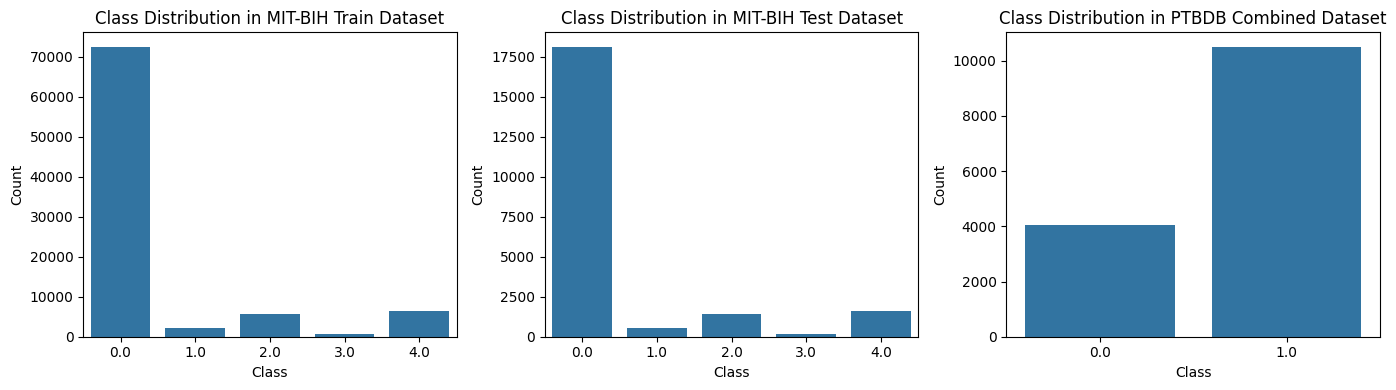

In [17]:
# Combine PTBDB datasets
ptbdb_combined = pd.concat([ptbdb_normal, ptbdb_abnormal])

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot class distribution for MIT-BIH Train Dataset
sns.countplot(x=mitbih_train[187], ax=axes[0])
axes[0].set_title('Class Distribution in MIT-BIH Train Dataset')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot class distribution for MIT-BIH Test Dataset
sns.countplot(x=mitbih_test[187], ax=axes[1])
axes[1].set_title('Class Distribution in MIT-BIH Test Dataset')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Plot class distribution for PTBDB Combined Dataset
sns.countplot(x=ptbdb_combined[187], ax=axes[2])
axes[2].set_title('Class Distribution in PTBDB Combined Dataset')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()

###    Commentary:

- MIT-BIH: The majority class is '0' (Normal), while other classes are significantly underrepresented, indicating a class imbalance issue.



- PTBDB: There is a noticeable imbalance between normal and abnormal classes.

In [18]:
# Calculate the percentage of each class in the training dataset
train_class_distribution = mitbih_train[187].value_counts(normalize=True) * 100
print("Training Set Class Distribution:\n", train_class_distribution)

# Calculate the percentage of each class in the test dataset
test_class_distribution = mitbih_test[187].value_counts(normalize=True) * 100
print("\nTest Set Class Distribution:\n", test_class_distribution)

# Calculate the percentage of each class in the PTBDB combined dataset
ptbdb_class_distribution = ptbdb_combined[187].value_counts(normalize=True) * 100
print("\nPTBDB Combined Class Distribution:\n", ptbdb_class_distribution)

Training Set Class Distribution:
 0.0    82.772917
4.0     7.345181
2.0     6.610777
1.0     2.539005
3.0     0.732120
Name: 187, dtype: float64

Test Set Class Distribution:
 0.0    82.760826
4.0     7.345149
2.0     6.614288
1.0     2.539741
3.0     0.739996
Name: 187, dtype: float64

PTBDB Combined Class Distribution:
 1.0    72.196262
0.0    27.803738
Name: 187, dtype: float64


# 2. Histogram of Features

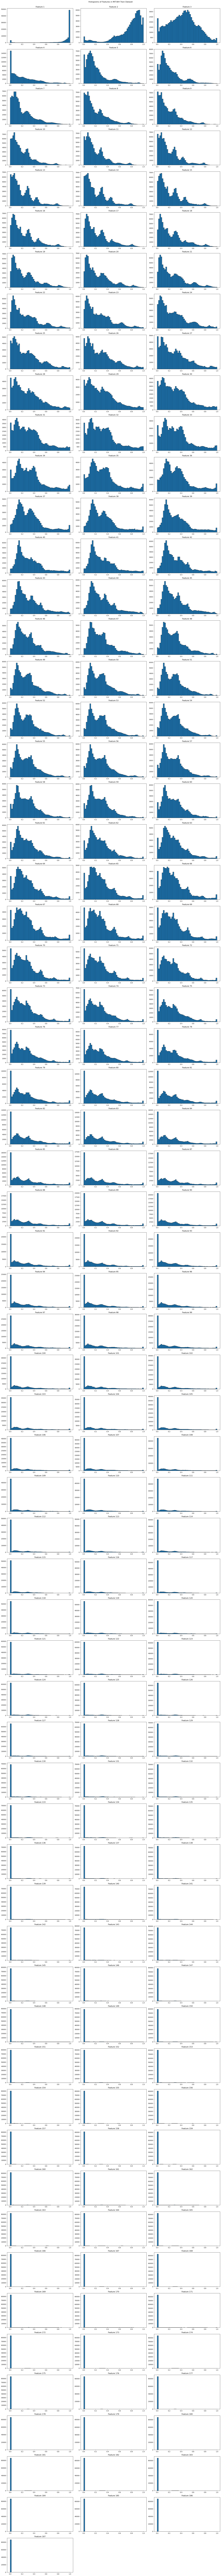

In [22]:
# Plot histograms of all features in MIT-BIH Train and Test Datasets
# Function to plot histograms for each feature in a DataFrame
def plot_histograms(data, title):
    num_features = data.shape[1]
    num_cols = 3  # Define the number of columns you want in the subplot grid
    num_rows = (num_features // num_cols) + 1  # Calculate number of rows required

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i in range(num_features):
        ax = axes[i]
        ax.hist(data.iloc[:, i], bins=50, edgecolor='black')
        ax.set_title(f'Feature {i+1}')

    # Remove any empty subplots
    for i in range(num_features, len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle(title, y=0.95)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot histograms for MIT-BIH Train Dataset
plot_histograms(mitbih_train.iloc[:, :-1], 'Histograms of Features in MIT-BIH Train Dataset')


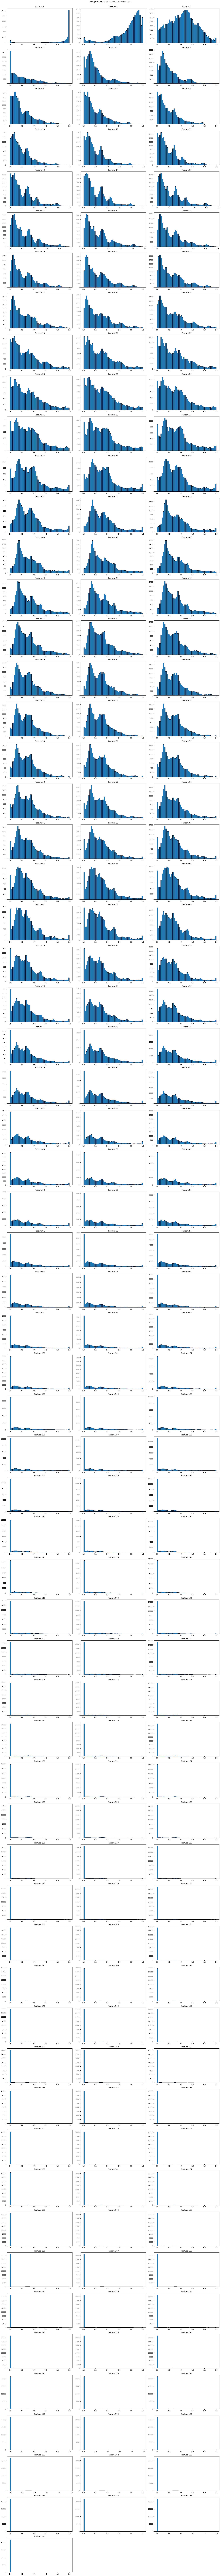

In [23]:
# Plot histograms for MIT-BIH Test Dataset
plot_histograms(mitbih_test.iloc[:, :-1], 'Histograms of Features in MIT-BIH Test Dataset')

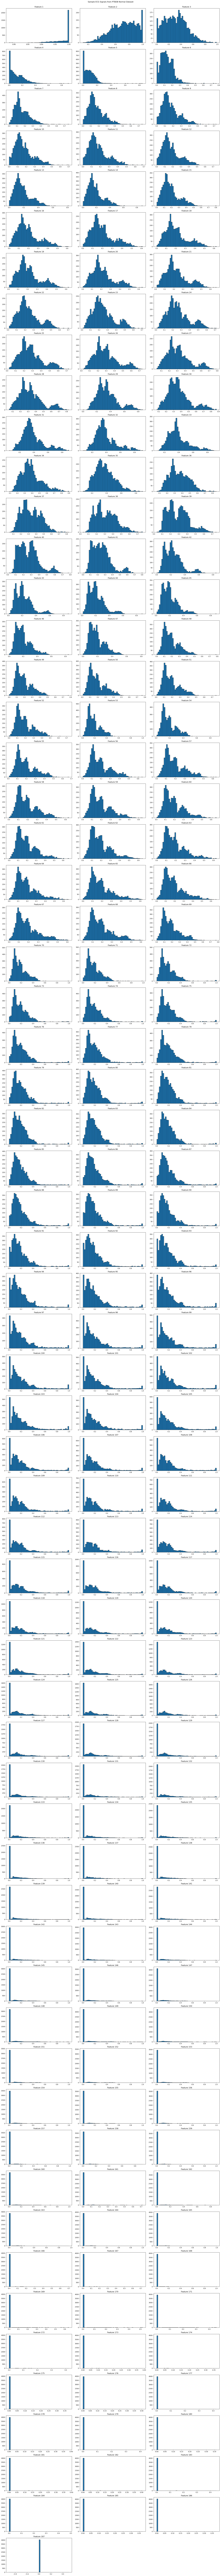

In [23]:
# Plot histograms for PTBDB Normal Dataset
plot_histograms(ptbdb_normal.iloc[:, :-1], 'Histograms of Features in PTBDB Normal Dataset')

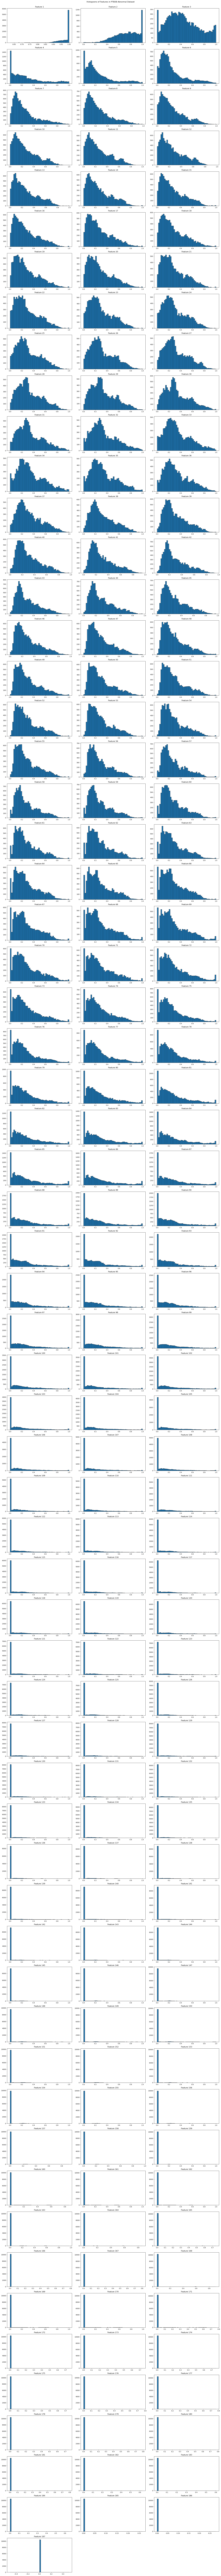

In [24]:
# Plot histograms for PTBDB Normal Dataset
plot_histograms(ptbdb_abnormal.iloc[:, :-1], 'Histograms of Features in PTBDB Abnormal Dataset')

# 3. Box ploting

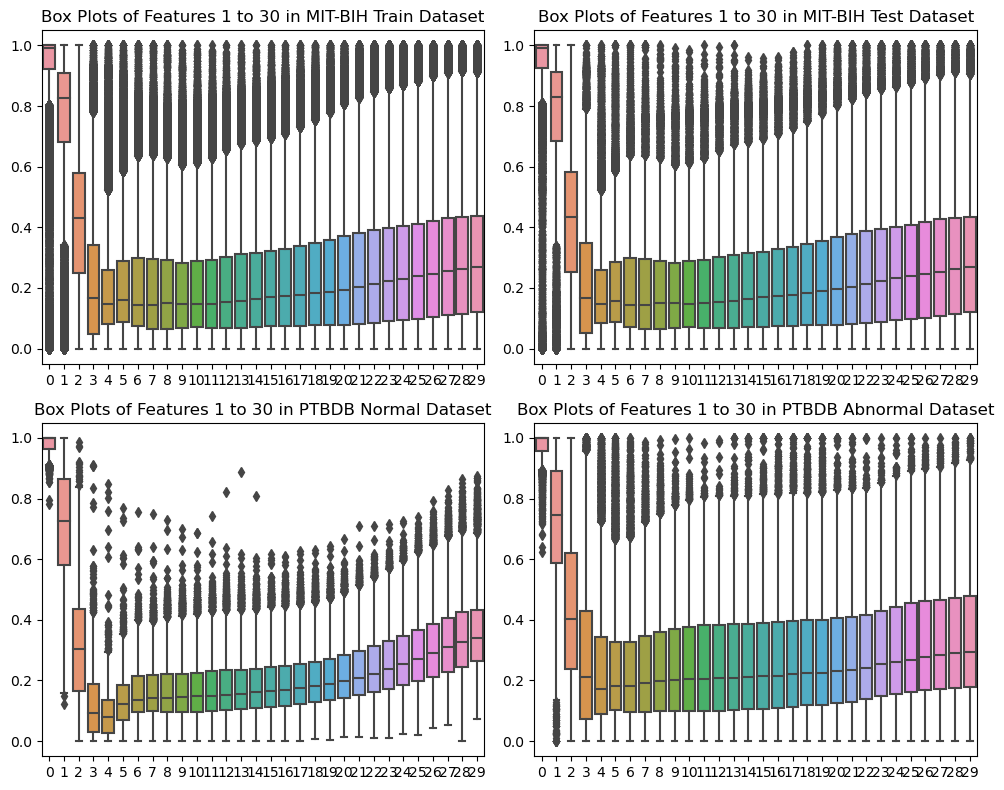

In [89]:
# Function to plot box plots for a subset of features in a DataFrame

def plot_box_plots(ax, data, title, start_feature=0, num_features=30):
    end_feature = min(start_feature + num_features, data.shape[1])
    sns.boxplot(data=data.iloc[:, start_feature:end_feature], ax=ax)
    ax.set_title(f'Box Plots of Features {start_feature+1} to {end_feature} in {title}')

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot box plots in each subplot
plot_box_plots(axes[0, 0], mitbih_train.iloc[:, :-1], 'MIT-BIH Train Dataset')
plot_box_plots(axes[0, 1], mitbih_test.iloc[:, :-1], 'MIT-BIH Test Dataset')
plot_box_plots(axes[1, 0], ptbdb_normal.iloc[:, :-1], 'PTBDB Normal Dataset')
plot_box_plots(axes[1, 1], ptbdb_abnormal.iloc[:, :-1], 'PTBDB Abnormal Dataset')

# Adjust layout
plt.tight_layout()

plt.show()

# 4. Correlation Matrix

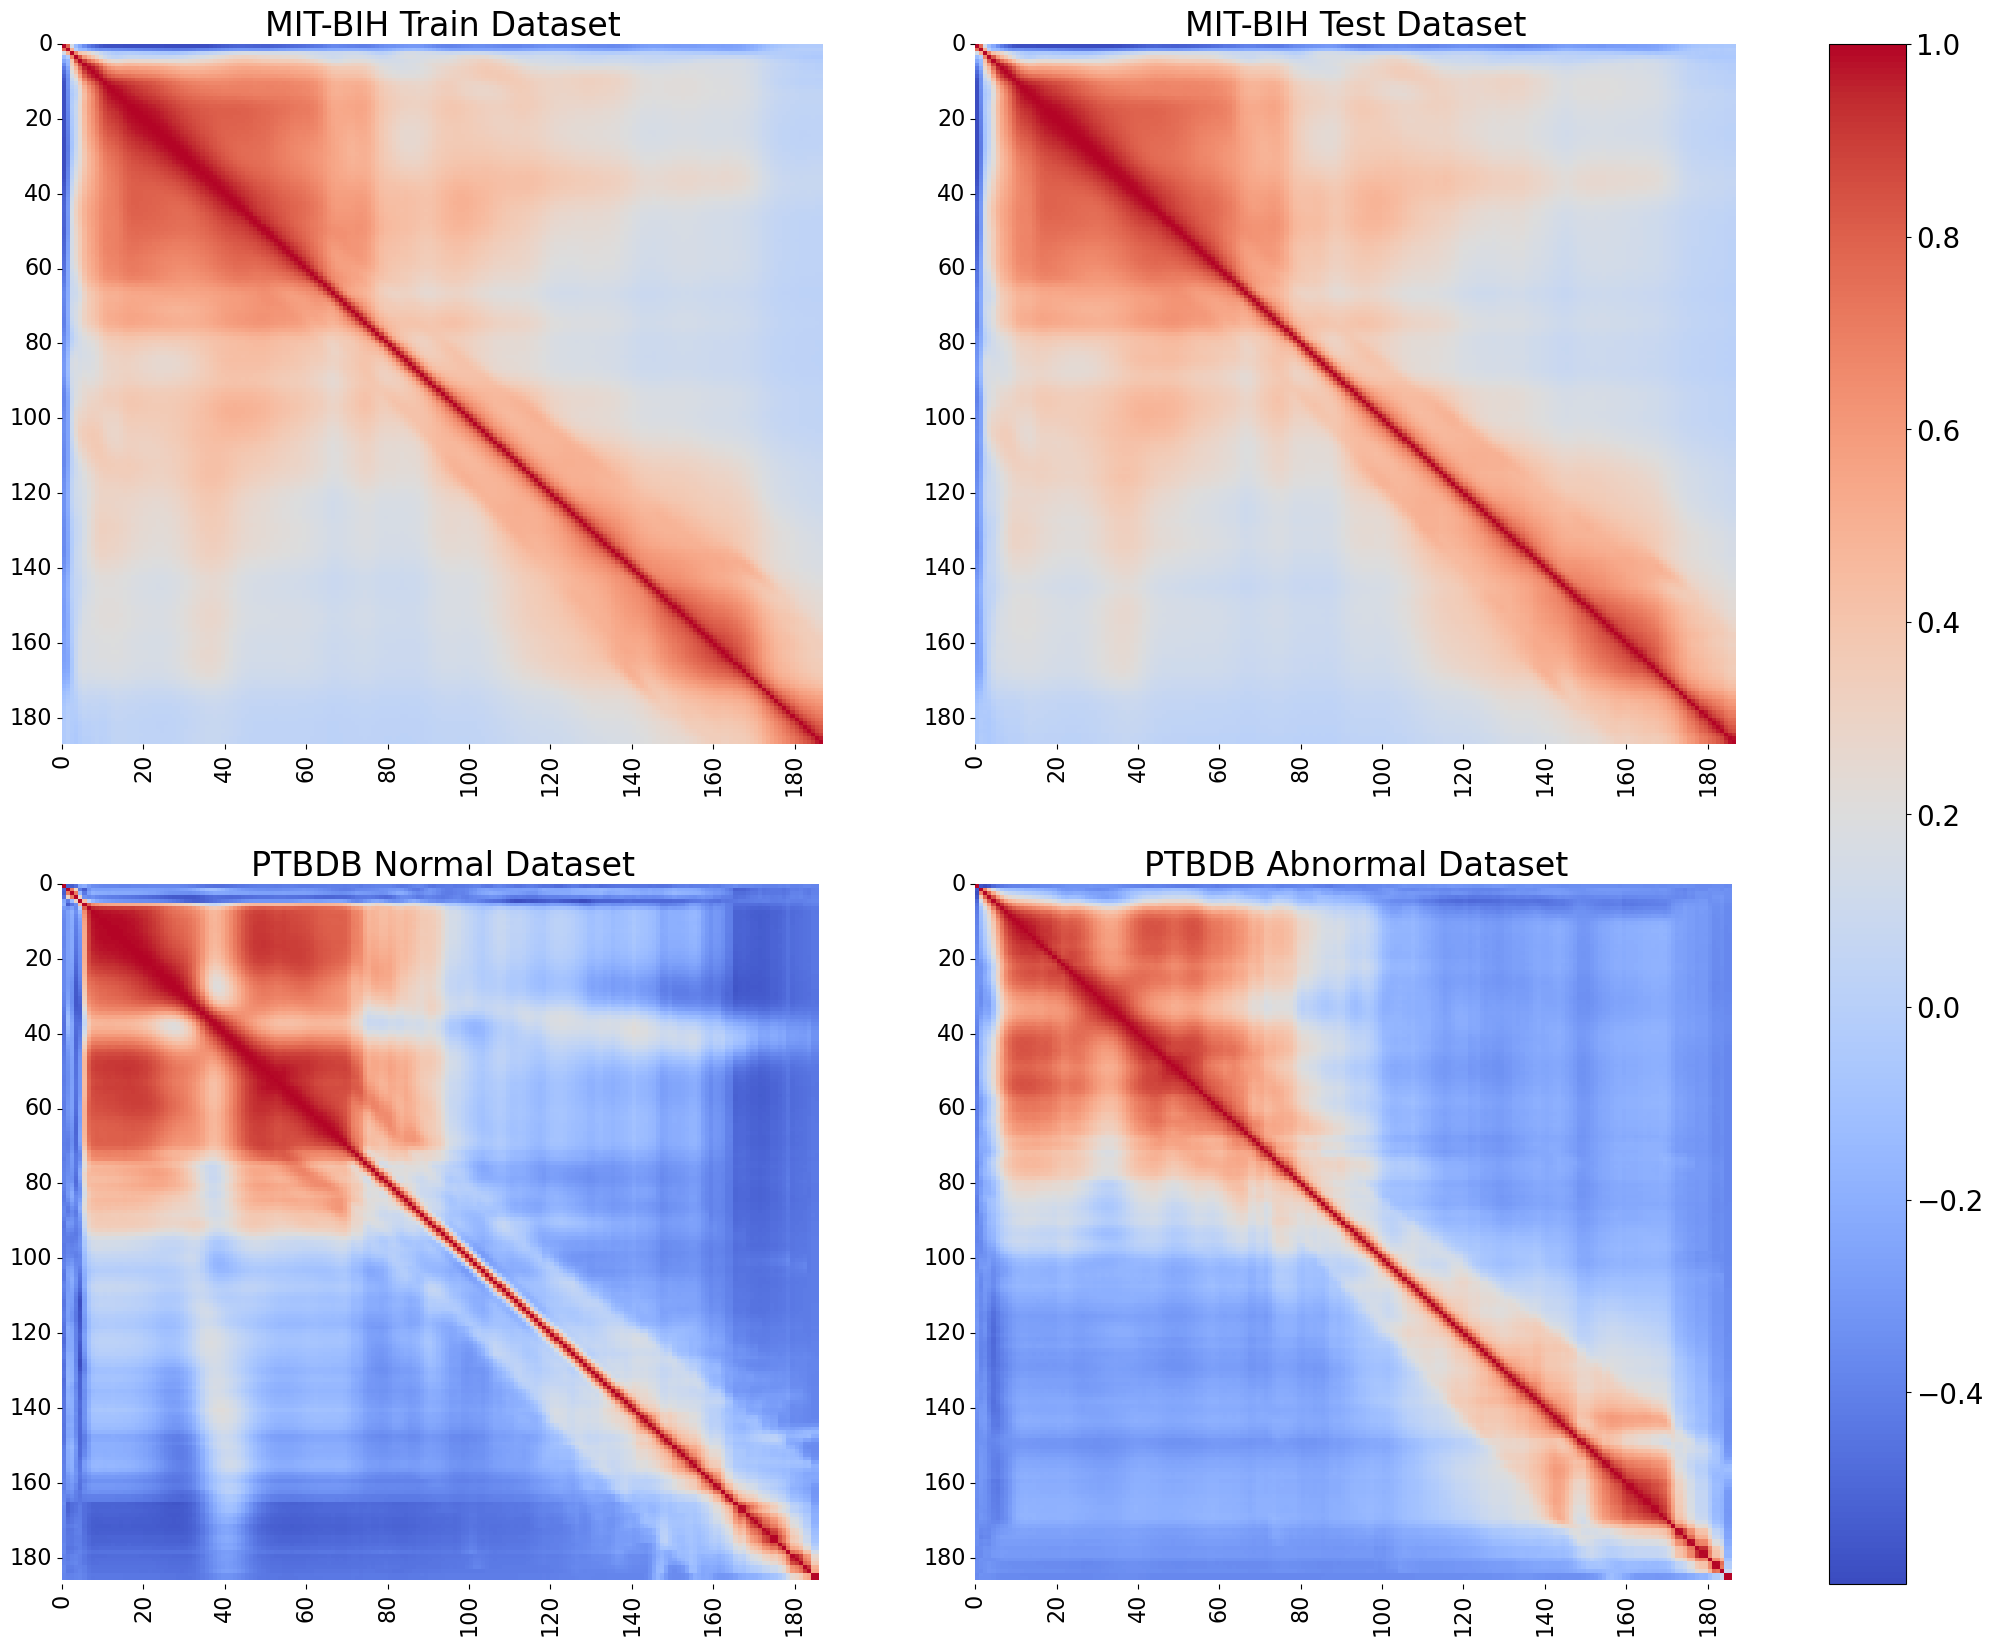

In [66]:
# Compute correlation matrices
corr_mitbih_train = mitbih_train.iloc[:, :-1].corr()
corr_mitbih_test = mitbih_test.iloc[:, :-1].corr()
corr_ptbdb_normal = ptbdb_normal.iloc[:, :-1].corr()
corr_ptbdb_abnormal = ptbdb_abnormal.iloc[:, :-1].corr()



fig, axes = plt.subplots(2, 2, figsize=(24, 20))
# Function to adjust tick labels
def set_ticks(ax, num_features):
    ax.set_xticks(range(0, num_features, 20))
    ax.set_xticklabels(range(0, num_features, 20), fontsize=16, rotation=90)
    ax.set_yticks(range(0, num_features, 20))
    ax.set_yticklabels(range(0, num_features, 20), fontsize=16)

# Plot MIT-BIH Train Dataset Correlation Matrix
sns.heatmap(corr_mitbih_train, annot=False, cmap='coolwarm', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('MIT-BIH Train Dataset', fontsize=24)
set_ticks(axes[0, 0], mitbih_train.shape[1] - 1)

# Plot MIT-BIH Test Dataset Correlation Matrix
sns.heatmap(corr_mitbih_test, annot=False, cmap='coolwarm', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('MIT-BIH Test Dataset', fontsize=24)
set_ticks(axes[0, 1], mitbih_test.shape[1] - 1)

# Plot PTBDB Normal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_normal, annot=False, cmap='coolwarm', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('PTBDB Normal Dataset', fontsize=24)
set_ticks(axes[1, 0], ptbdb_normal.shape[1] - 1)

# Plot PTBDB Abnormal Dataset Correlation Matrix
sns.heatmap(corr_ptbdb_abnormal, annot=False, cmap='coolwarm', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('PTBDB Abnormal Dataset', fontsize=24)
set_ticks(axes[1, 1], ptbdb_abnormal.shape[1] - 1)

# Add a single colorbar for the entire figure
# Adjust colorbar tick size
cbar = fig.colorbar(axes[0, 0].collections[0], ax=axes, orientation='vertical', fraction=0.05, pad=0.05)
cbar.ax.tick_params(labelsize=20)


plt.show()

In [ ]:
# 5. ECG Signal Examples

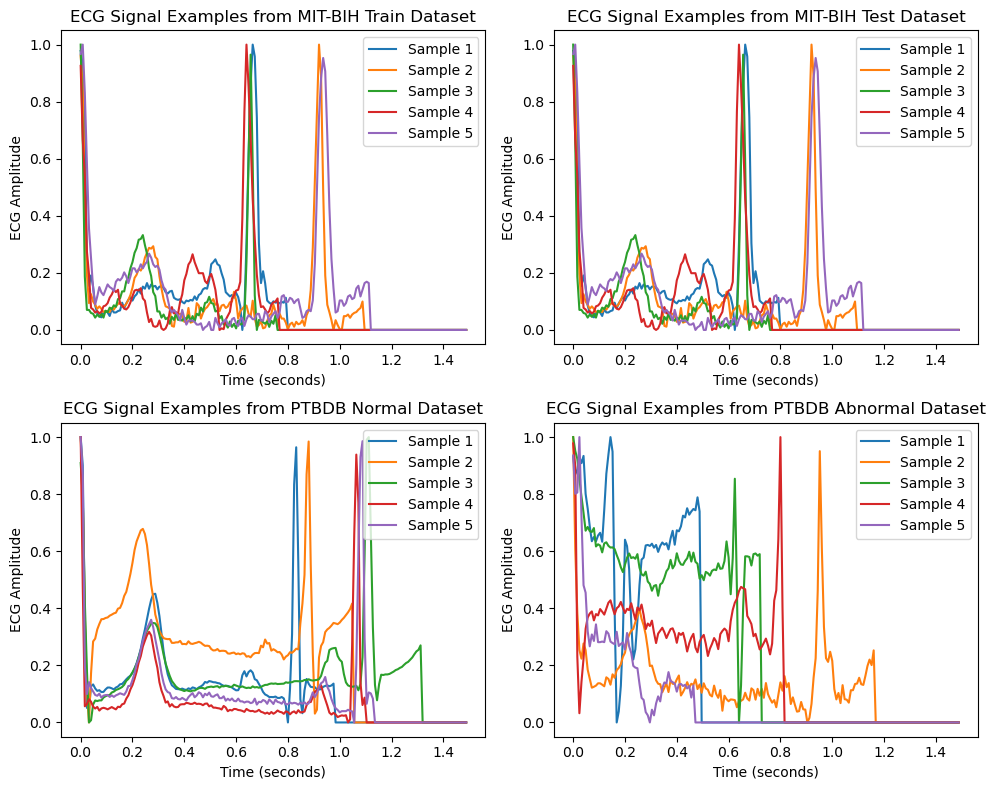

In [111]:

# Function to plot ECG signals
def plot_ecg_signals(ax, data, title, num_signals=5, sampling_frequency=125):
    time_axis = [i / sampling_frequency for i in range(data.shape[1] - 1)]
    for i in range(num_signals):
        ax.plot(time_axis, data.iloc[i, :-1], label=f'Sample {i+1}')
    ax.set_title(title)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('ECG Amplitude')
    ax.legend()

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot ECG signals for MIT-BIH Train Dataset
plot_ecg_signals(axes[0, 0], mitbih_train, 'ECG Signal Examples from MIT-BIH Train Dataset')

# Plot ECG signals for MIT-BIH Test Dataset
plot_ecg_signals(axes[0, 1], mitbih_train, 'ECG Signal Examples from MIT-BIH Test Dataset')

# Plot ECG signals for PTBDB Normal Dataset
plot_ecg_signals(axes[1, 0], ptbdb_normal, 'ECG Signal Examples from PTBDB Normal Dataset')

# Plot ECG signals for PTBDB Normal Dataset
plot_ecg_signals(axes[1, 1], ptbdb_abnormal, 'ECG Signal Examples from PTBDB Abnormal Dataset')

# Adjust layout
plt.tight_layout()

plt.show()